In [1]:
import pandas as pd
import pyreadr

result = pyreadr.read_r("5v_cleandf.rdata") 

df = result['df']

df.head()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,B,4,40,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,...,0,0,0,0,0,0,0,0,0,0
1,B,4,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
2,B,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
3,A,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
4,A,3,84,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#df.to_csv("Hospital Triage and Patient History.csv",index=False)

In [3]:
significantColumns = ['cc_chestpain', 'cc_breathingdifficulty', 'cc_syncope', 'cc_unresponsive', 'cc_seizure-newonset', 'cc_seizure-priorhxof', 'cc_seizures',
                            'cc_bleeding/bruising', 'cc_hyperglycemia', 'cc_hypertension', 'cc_hypotension', 'cc_strokealert', 'cc_overdose-accidental',
                            'cc_overdose-intentional', 'cc_suicidal']

In [4]:
def getNumberOfDifferentElementsInDF(df, columns):
    df['incomplete_data'] = df[columns].isnull().all(axis=1)
    return df['incomplete_data'].value_counts()

In [5]:
from sklearn.impute import SimpleImputer

# Get the number of different elements on the DataFrame
getNumberOfDifferentElementsInDF(df, significantColumns)

# Manejo de valores nulos en las columnas seleccionadas
imputer = SimpleImputer(strategy='most_frequent')  
df[significantColumns] = imputer.fit_transform(df[significantColumns])

# Check if all the rows now have valid values
getNumberOfDifferentElementsInDF(df, significantColumns)


False    560486
Name: incomplete_data, dtype: int64

In [6]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=significantColumns)

/var/folders/59/5ybt3_cs4r14rvz3442yrh5w0000gn/T/ipykernel_60172/2862015682.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df, columns=significantColumns)


In [7]:
df['emergency_flag_column'] = df[significantColumns].any(axis=1)
print(df['emergency_flag_column'].value_counts())

False    493625
True      66861
Name: emergency_flag_column, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# División de datos
X = df.drop(columns=['emergency_flag_column'])
y = df['emergency_flag_column']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

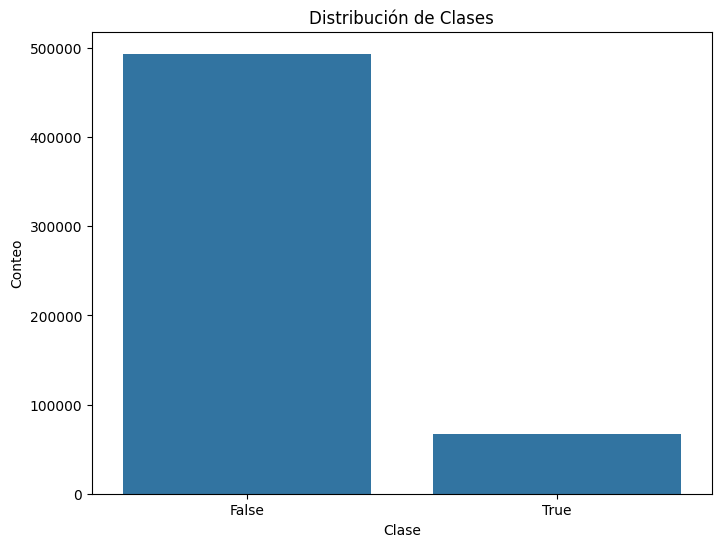

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las características y las etiquetas codificadas
df_plot = X.copy()
df_plot['emergency_flag'] = y

# Graficar la distribución de las clases
plt.figure(figsize=(8, 6))
sns.countplot(x='emergency_flag', data=df_plot)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Identificar las variables categóricas
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':  # Verificar si la columna es de tipo 'object'
        categorical_columns.append(column)

# Convertir las variables categóricas usando LabelEncoder
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])



In [24]:
# Entrenamiento del modelo
from sklearn.ensemble import RandomForestClassifier
# División de datos
X = df.drop(columns=['emergency_flag_column'])
y = df['emergency_flag_column']

# Convertir la variable objetivo usando LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# División de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validación del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

ValueError: Cannot cast object dtype to float64